## Proyecto 2 - Image Classification with CNN
### Puntos 2 y 3

**Silverio Carmona Lozano    | 199618115**

**Lady D. Oñate Vega         | 200814451**

**Carlos J. Quispe Castilla  | 201627368**

**Johan D. Suarez Acero      | 200713010**

In [35]:
from keras.utils import np_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

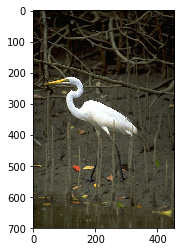

In [6]:
# Verificación de lectura de imágenes correctamente
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img = load_img('./birds/egret/egr003.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
plt.imshow(img)

### 2. Transfer learning

#### Carga una instancia de VGG16 convolutional base

In [37]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [38]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

#### Dimensiones y parámetros para el modelo

In [39]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '../datasets/birds'
validation_data_dir = '../datasets/birdsv'
nb_train_samples = 540
nb_validation_samples = 60
epochs = 50
batch_size = 60
batch_size2 = 10

#### Definir el clasificador densamente conectado

In [40]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import layers
from keras import models


if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(6))
model.add(Activation('softmax'))

#### Compila el modelo definido 

In [41]:
model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

#### Entrena el clasificador

In [42]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 480 images belonging to 6 classes.
Found 120 images belonging to 6 classes.


In [43]:
epochs = 10
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
9/9 [==============================] - 10s 1s/step - loss: 1.9863 - acc: 0.1648 - val_loss: 1.7759 - val_acc: 0.2167
Epoch 2/10
9/9 [==============================] - 10s 1s/step - loss: 1.7779 - acc: 0.2556 - val_loss: 1.8207 - val_acc: 0.2167
Epoch 3/10
9/9 [==============================] - 10s 1s/step - loss: 1.7026 - acc: 0.2963 - val_loss: 1.6581 - val_acc: 0.3667
Epoch 4/10
9/9 [==============================] - 9s 1s/step - loss: 1.6151 - acc: 0.3537 - val_loss: 1.5648 - val_acc: 0.4333
Epoch 5/10
9/9 [==============================] - 10s 1s/step - loss: 1.4261 - acc: 0.4500 - val_loss: 1.3319 - val_acc: 0.4833
Epoch 6/10
9/9 [==============================] - 10s 1s/step - loss: 1.3780 - acc: 0.4611 - val_loss: 1.2028 - val_acc: 0.5333
Epoch 7/10
9/9 [==============================] - 10s 1s/step - loss: 1.2187 - acc: 0.5519 - val_loss: 1.3278 - val_acc: 0.5167
Epoch 8/10
9/9 [==============================] - 10s 1s/step - loss: 1.1887 - acc: 0.5574 - val_loss: 1.

#### Feature extraction
    Adicionamos el clasificador densamente conectado al inicio de la base convolucional

In [44]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import models
from keras import layers

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(6))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
activation_13 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 1542      
_________________________________________________________________
activation_14 (Activation)   (None, 6)                 0         
Total params: 16,813,638
Trainable params: 16,813,638
Non-trainable params: 0
________________________________________________________________

**Congelamos la base convolucional para evitar que sus pesos sean actualizados durante el entrenamiento**

In [45]:
conv_base.trainable = False

**Entrenamos el modelo end to end con la base convolucional congelada con 10 epochs para obtener un mejor ajuste**

In [46]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 480 images belonging to 6 classes.
Found 120 images belonging to 6 classes.


In [47]:
model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

In [48]:
epochs = 10
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.summary()

Epoch 1/10
9/9 [==============================] - 73s 8s/step - loss: 8.4221 - acc: 0.2593 - val_loss: 8.6682 - val_acc: 0.4333
Epoch 2/10
9/9 [==============================] - 71s 8s/step - loss: 6.5571 - acc: 0.4056 - val_loss: 4.3983 - val_acc: 0.5333
Epoch 3/10
9/9 [==============================] - 71s 8s/step - loss: 1.5590 - acc: 0.6241 - val_loss: 1.0564 - val_acc: 0.6667
Epoch 4/10
9/9 [==============================] - 71s 8s/step - loss: 0.5102 - acc: 0.8241 - val_loss: 0.3800 - val_acc: 0.8667
Epoch 5/10
9/9 [==============================] - 71s 8s/step - loss: 0.3892 - acc: 0.8815 - val_loss: 0.6980 - val_acc: 0.7500
Epoch 6/10
9/9 [==============================] - 71s 8s/step - loss: 0.5103 - acc: 0.8648 - val_loss: 1.9173 - val_acc: 0.6000
Epoch 7/10
9/9 [==============================] - 71s 8s/step - loss: 0.3514 - acc: 0.9074 - val_loss: 0.5082 - val_acc: 0.8333
Epoch 8/10
9/9 [==============================] - 91s 10s/step - loss: 0.1584 - acc: 0.9352 - val_loss: 

**Plot los resultados de la pérdida y del accuracy. Observamos un muy buen comportamiento en la pérdida del train y validation set. Llegamos aumentar el accuracy del 62% al 97%, explicado por la posibilidad de adicionar un modelo preentrenado con un gran volumen de datos. **

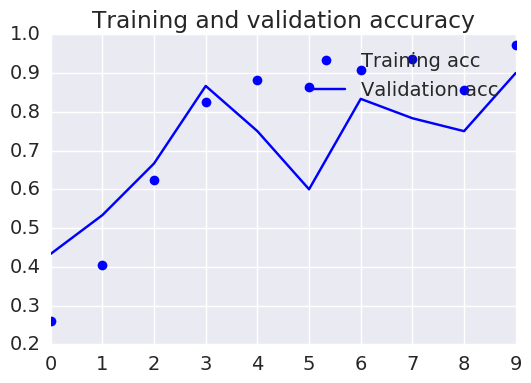

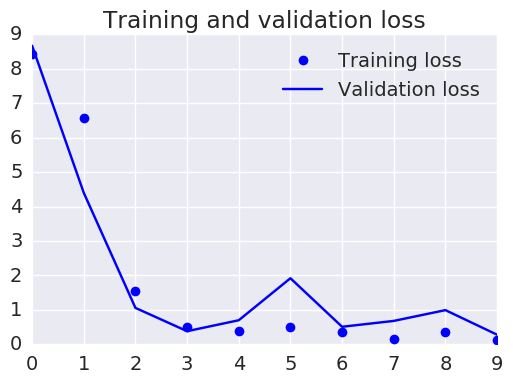

In [49]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Procedemos a realizar la predicción y creamos la matriz de confusión**

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0.

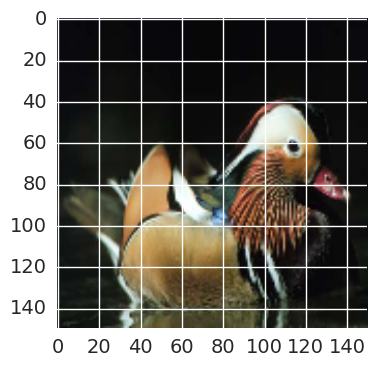

In [50]:
for x_batch, y_batch in validation_generator:
  plt.imshow(x_batch[5])
  print(y_batch)
  print(model.predict_proba(x_batch))
  break

In [51]:
def create_confusion_matrix(testY, pred): #creamos la funcion dados los datos para comparar las predicciones con la realidad
    cnf_matrix = confusion_matrix(testY, pred)
    #normalizar la matriz de confusion 
    cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
    label_fm = np.unique(testY).astype(int)
    
    df_cnf_matrix = pd.DataFrame(cnf_matrix, label_fm, label_fm)
    sn.set(font_scale=1.4)#tamano letra
    sn.heatmap(df_cnf_matrix, annot=True, annot_kws={"size": 16})# font size

In [52]:
len(y_batch)

60

In [53]:
y_vect=[]
for i in range(len(y_batch)):
    for j in range(6): 
        if y_batch[i,j] == 1:
            y_vect.append(j)

**Los resultados de la matriz muestran un gran comportamiento en la predicción en cada una de las 6 categorías. Esto se explica por las ventajas de aprovechar la portabilidad de características aprendidas por diferentes modelos entrenados con un gran volumen de datos.  Estas son muy efectivas para problemas con pequeños datos como este caso**

**Dado que el dataset original es suficientemente grande, las características aprendidas puden ser trasladadas efectivamente y actuar como un modelo general**

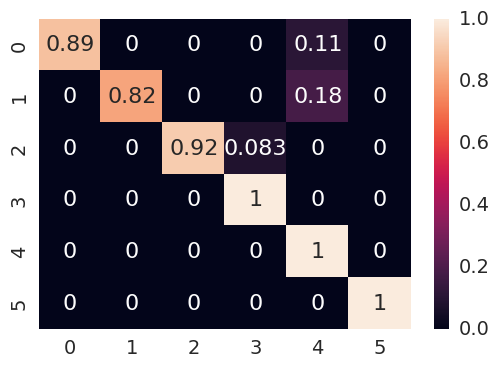

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
bird_pred = model.predict_classes(x_batch)
#red_pred = neighbors_red.predict(red_testX)
create_confusion_matrix(y_vect, bird_pred)

In [55]:
print(y_vect)

[2, 2, 1, 3, 3, 1, 1, 1, 1, 2, 3, 4, 5, 0, 3, 4, 5, 0, 0, 4, 2, 1, 5, 4, 4, 0, 0, 4, 1, 4, 5, 4, 2, 5, 1, 3, 2, 4, 2, 2, 5, 2, 5, 1, 0, 5, 2, 1, 2, 4, 4, 0, 3, 5, 3, 1, 2, 0, 5, 0]


In [56]:
np.histogram(y_vect)

(array([ 9,  0, 11,  0, 12,  0,  7,  0, 11, 10]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]))

In [57]:
print(model.predict_classes(x_batch))

[2 3 1 3 3 1 1 1 1 2 3 4 5 0 3 4 5 4 0 4 2 1 5 4 4 0 0 4 1 4 5 4 2 5 4 3 2
 4 2 2 5 2 5 1 0 5 2 1 2 4 4 0 3 5 3 4 2 0 5 0]


In [58]:
type(model.predict_classes(x_batch))

numpy.ndarray

### 3. Fine tuning - Activar los últimos niveles

**Para fine tuning debemos primero descongelar unos pocos niveles del modelo y entrenarlos conjuntamente con laparte del modelo original**.

**En este caso dado que ya realizamos la parte de feature extraction procedemos a descongelar los últimos niveles convolucionales y realizar el fine tuning**

In [59]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [60]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])

In [61]:
epochs = 10
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.summary()

Epoch 1/10
9/9 [==============================] - 83s 9s/step - loss: 0.0383 - acc: 0.9889 - val_loss: 0.1550 - val_acc: 0.9333
Epoch 2/10
9/9 [==============================] - 81s 9s/step - loss: 0.0156 - acc: 0.9963 - val_loss: 0.1969 - val_acc: 0.9333
Epoch 3/10
9/9 [==============================] - 80s 9s/step - loss: 0.0121 - acc: 0.9981 - val_loss: 0.1464 - val_acc: 0.9333
Epoch 4/10
9/9 [==============================] - 81s 9s/step - loss: 0.0091 - acc: 1.0000 - val_loss: 0.1532 - val_acc: 0.9500
Epoch 5/10
9/9 [==============================] - 81s 9s/step - loss: 0.0077 - acc: 0.9981 - val_loss: 0.2159 - val_acc: 0.9500
Epoch 6/10
9/9 [==============================] - 81s 9s/step - loss: 0.0056 - acc: 1.0000 - val_loss: 0.2117 - val_acc: 0.9333
Epoch 7/10
9/9 [==============================] - 81s 9s/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.1874 - val_acc: 0.9500
Epoch 8/10
9/9 [==============================] - 82s 9s/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0

**Plot los resultados de la pérdida y del accuracy. Observamos un muy buen comportamiento tanto en el loss como en el accuracy**

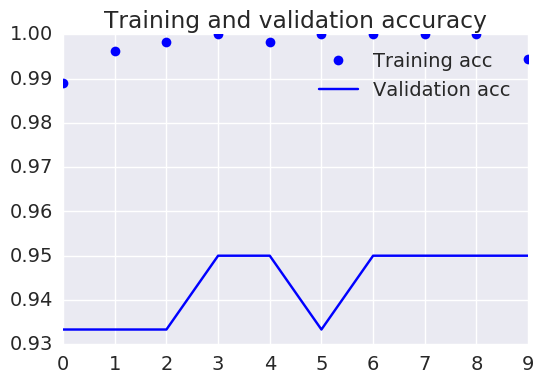

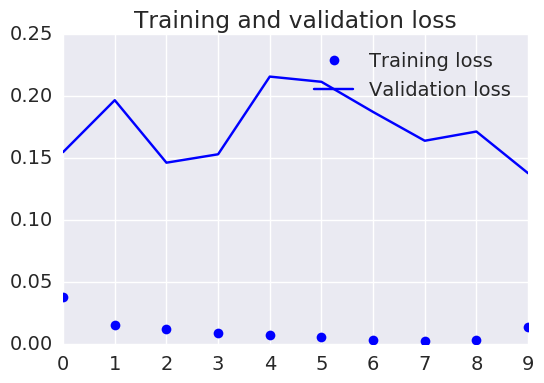

In [62]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Procedemos a realizar la predicción y creamos la matriz de confusión**

[[0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1.

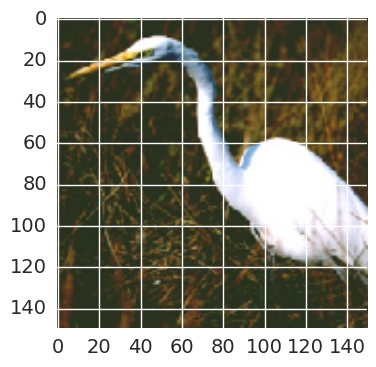

In [63]:
for x_batch, y_batch in validation_generator:
  plt.imshow(x_batch[5])
  print(y_batch)
  print(model.predict_proba(x_batch))
  break

In [64]:
len(y_batch)

60

In [65]:
y_vect=[]
for i in range(len(y_batch)):
    for j in range(6): 
        if y_batch[i,j] == 1:
            y_vect.append(j)

**Los resultados de la matriz muestran una ligera mejoría en la predicción respecto a fearture extraction al pasar de 97.4% al 99%.**

**Esto se explica por un lado, al igual que en feature extraction por la capacidad de realizar la portabilidad de un modelo entrenado con gran volumen de datos y por otro lado porque estamos usando las representaciones más abstractas de un modelo preentrenado, lo que hace estas caracterpisticas más representativas en el nuevo problema.**

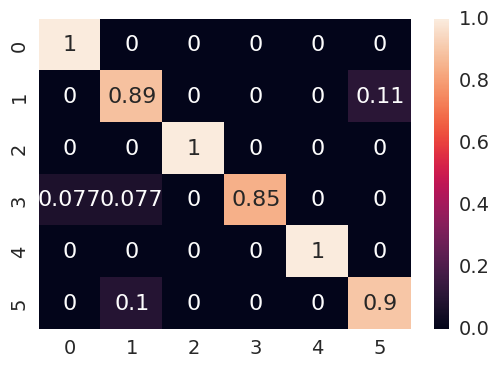

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
bird_pred = model.predict_classes(x_batch)
#red_pred = neighbors_red.predict(red_testX)
create_confusion_matrix(y_vect, bird_pred)

In [67]:
print(y_vect)

[5, 1, 4, 1, 0, 0, 3, 3, 3, 0, 3, 5, 0, 5, 4, 2, 1, 1, 0, 5, 4, 5, 4, 3, 4, 0, 3, 2, 3, 5, 3, 5, 5, 0, 2, 4, 3, 3, 4, 0, 2, 2, 5, 5, 4, 2, 0, 3, 3, 3, 1, 1, 2, 2, 0, 0, 1, 4, 1, 1]


In [68]:
print(model.predict_classes(x_batch))

[5 1 4 1 0 0 3 3 3 0 3 5 0 5 4 2 1 5 0 5 4 5 4 3 4 0 1 2 3 5 3 5 5 0 2 4 0
 3 4 0 2 2 5 1 4 2 0 3 3 3 1 1 2 2 0 0 1 4 1 1]
